This is the another version of already written convolutional neural network but i have made some changes to the layers and the epochs to gain high accuracy


In [4]:
# Libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from PIL import Image
import os


In [5]:
# Reading the input images and putting them into a numpy array
data=[]
labels=[]

height = 30
width = 30
channels = 3
classes = 43
n_inputs = height * width*channels

for i in range(classes) :
    path = "./gtsrb-german-traffic-sign/train/{0}/".format(i)
#     print(path)
    Class=os.listdir(path)
    for a in Class:
        try:
            image=cv2.imread(path+a)
            image_from_array = Image.fromarray(image, 'RGB')
            size_image = image_from_array.resize((height, width))
            data.append(np.array(size_image))
            labels.append(i)
        except AttributeError:
            print(" ")
            
Cells=np.array(data)
labels=np.array(labels)

#Randomize the order of the input images
s=np.arange(Cells.shape[0])
np.random.seed(43)
np.random.shuffle(s)
Cells=Cells[s]
labels=labels[s]

In [6]:
#Spliting the images into train and validation sets
(X_train,X_val)=Cells[(int)(0.2*len(labels)):],Cells[:(int)(0.2*len(labels))]
X_train = X_train.astype('float32')/255 
X_val = X_val.astype('float32')/255
(y_train,y_val)=labels[(int)(0.2*len(labels)):],labels[:(int)(0.2*len(labels))]

#Using one hote encoding for the train and validation labels
from keras.utils import to_categorical
y_train = to_categorical(y_train, 43)
y_val = to_categorical(y_val, 43)

In [7]:
#Definition of the DNN model

from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

#Compilation of the model
model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)

Train on 31368 samples, validate on 7841 samples
Epoch 1/20
31368/31368 [==============================] - 11s 344us/step - loss: 1.3670 - acc: 0.6100 - val_loss: 0.2334 - val_acc: 0.9339
Epoch 2/20
31368/31368 [==============================] - 6s 178us/step - loss: 0.3267 - acc: 0.8963 - val_loss: 0.0967 - val_acc: 0.9741
Epoch 3/20
31368/31368 [==============================] - 6s 191us/step - loss: 0.2041 - acc: 0.9363 - val_loss: 0.0581 - val_acc: 0.9865
Epoch 4/20
31368/31368 [==============================] - 6s 184us/step - loss: 0.1535 - acc: 0.9494 - val_loss: 0.0403 - val_acc: 0.9892
Epoch 5/20
31368/31368 [==============================] - 5s 171us/step - loss: 0.1209 - acc: 0.9606 - val_loss: 0.0365 - val_acc: 0.9906
Epoch 6/20
31368/31368 [==============================] - 6s 180us/step - loss: 0.1062 - acc: 0.9673 - val_loss: 0.0376 - val_acc: 0.9902
Epoch 7/20
31368/31368 [==============================] - 5s 172us/step - loss: 0.0959 - acc: 0.9692 - val_loss: 0.0251 - 

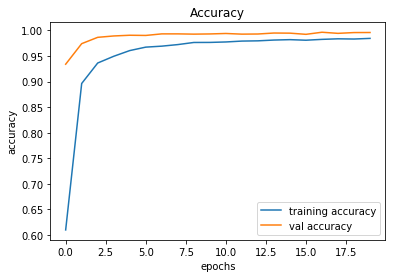

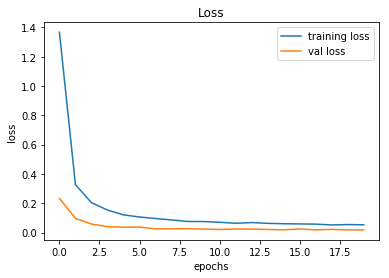

In [8]:
#using ten epochs for the training and saving the accuracy for each epoch
epochs = 20
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs,
validation_data=(X_val, y_val))

In [11]:
model.save("final_model.h5")

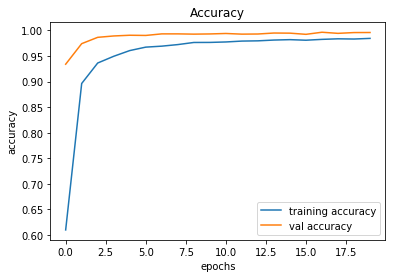

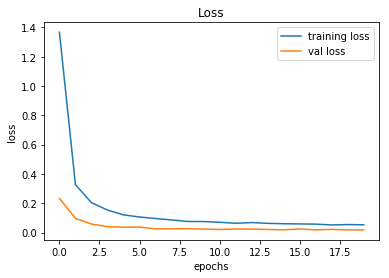

In [13]:
#Display of the accuracy and the loss values
import matplotlib.pyplot as plt

plt.figure(0)
plt.plot(history.history['acc'], label='training accuracy')
plt.plot(history.history['val_acc'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.savefig("model_performance.png")

In [9]:
#Predicting with the test data
y_test=pd.read_csv("./gtsrb-german-traffic-sign/Test.csv")
labels=y_test['Path'].as_matrix()
y_test=y_test['ClassId'].values

data=[]

for f in labels:
    image=cv2.imread('./gtsrb-german-traffic-sign/test/'+f.replace('Test/', ''))
    image_from_array = Image.fromarray(image, 'RGB')
    size_image = image_from_array.resize((height, width))
    data.append(np.array(size_image))

X_test=np.array(data)
X_test = X_test.astype('float32')/255 
pred = model.predict_classes(X_test)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
#Accuracy with the test data
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.9697545526524148